# Taller práctico sobre Análisis EDA
* Gestión del proyecto: Validar objetivos y factibilidad.
* Revise con criterio los recursos disponibles y asegúrese de confirmalo luego.
* Use el análisis exploratorio y descriptivo para corroborar los criterios antes planteados
* **Introducción a la Regresión Lineal**

**Definición del problema**

In [ ]:
#¿Cuál es el problema?

# No se tiene claridad de cual es el salario correcto que se deberia ofrecer a nuevos colaboradores

#¿Cuál es el objetivo? (DESCRIPTIVO (PASADO Y PRESENTE) Y PREDICTIVO (FUTURO))

# 1 . Para ello se quiere hacer un modelo predictivo para estimar el salario en base a los datos de nuestros colaboradores
# 2. Entender cuales son los principales factores que tienen relacion con el salario

# ¿Cómo resolvemos los objetivos?
#  Analisis Exploratorio de Datos que me permita entender las relaciones entre var. indep. vs dependiente
#. Desarrollar un modelo de regresión

# ¿Qué sigue? La obtención de la data

In [ ]:
# Instalación de las librerías

!pip install pandas #!pip instal "nombre de la libreria"

In [ ]:
# Importación de librerías (Este procedimiento si se debe hacer para cada notebook nuevo)

import pandas as pd # pandas es una libreria para analisis de datos
import seaborn as sns # seaborn es una librería para hacer graficos estadisticos
import numpy as np # numpy es una libreria para analisis estadisticos y matematicos
import matplotlib.pyplot as plt # es una libreria de visualizacion
import io # io es una libreria complementaria de python para poder ayudar a la carga de archivos locales
from google.colab import files # es una libreria propia de Colab para la carga de archivos locales

In [ ]:
uploaded = files.upload() # utilizar la libreria files para ya ejecutar la carga del archivo

Saving Data_salarios_regresión_S03.xlsx to Data_salarios_regresión_S03.xlsx


In [ ]:
# Convertimos nuestro archivo local al formato dataframe necesario para trabajar en Python

# Get the actual key from the 'uploaded' dictionary
file_name = list(uploaded.keys())[0]  # Get the first (and likely only) key

# Read the CSV using the correct file name
data = pd.read_excel(io.BytesIO(uploaded[file_name]))

In [ ]:
data.head(6) #head que muestra las primeras filas de mi base de datos, tail muestra las ultimas, sample me muestra filas aleatorias

,Experiencia,Nivel_Educativo,Evaluacion_Desempeno,Horas_Semanales,Edad,Genero,Departamento,Anos_en_la_Empresa,Titulo_Universitario,Nivel_Competencias,Salario_Soles
0,7,Maestria,3.765610,54,59,Hombre,TI,4,1,4.018661,5100
1,15,Doctorado,8.227233,59,43,Mujer,Finanzas,1,0,9.570376,5300
2,11,Maestria,5.852451,44,47,Mujer,Recursos Humanos,6,0,5.797498,6000
3,8,Maestria,3.801769,32,64,Mujer,TI,5,0,6.683899,5100
4,7,Grado,6.493004,48,60,Mujer,Ventas,10,0,5.886464,6400
5,19,Doctorado,7.445356,47,48,Mujer,Recursos Humanos,6,0,2.164426,7600


In [ ]:
data.info() # info es una función para conocer las principales caracteristicas de mi base de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Experiencia           1000 non-null   int64  
 1   Nivel_Educativo       1000 non-null   object 
 2   Evaluacion_Desempeno  1000 non-null   float64
 3   Horas_Semanales       1000 non-null   int64  
 4   Edad                  1000 non-null   int64  
 5   Genero                1000 non-null   object 
 6   Departamento          1000 non-null   object 
 7   Anos_en_la_Empresa    1000 non-null   int64  
 8   Titulo_Universitario  1000 non-null   int64  
 9   Nivel_Competencias    1000 non-null   float64
 10  Salario_Soles         1000 non-null   int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 86.1+ KB


In [ ]:
#¿Qué variables tenemos? ¿Tenemos target?

# Obtener los salarios que deberian tener los nuevos colaboradores

# Variable dependiente (y): Salario soles
# Variables independientes (X: X1,X2,..., Xn) : Todas menos el salario en soles

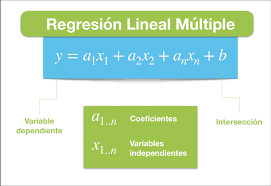

In [ ]:
# y = B0 + B1 * X1 + B2 * X2 + ....

In [ ]:
# Salario_Soles = B0 + B1 * Experiencia + B2 * Nivel Educativo + B3 * X3+ b4 * x4....

In [ ]:
# Los algoritmos de ML necesitan que todas las variables que se utilicen para entrenar esten en formato numerico

# ¿Y si son categoricas?

# Label Encoding (Variable dependientes e independientes cualitativa): Nivel Educativo : Secundaria, Tecnico, Universitario
#                  Nivel Educativo : 1, 2, 3

# One Hot Encoding (Variables independientes) : Nivel Educativo : Secundaria, Tecnico, Universitario
#.                 Nivel_educativo_secundaria : 1 (Si) / 0 (No)
#                  Nivel_educativo_Tecnico : 1 (Si) / O (No)

# Analizar la cantidad de registros (%) que tiene cada categoria

# Secundaria 79%, Tecnica 11%, Universitaria (3%), Maestria 3%, Doctorado 4%

# **Análisis Descriptivo**

In [ ]:
# Objetivo del análisis descriptivo, entender como se estan comportando todas las variables de mi base de datos (Univariado)
# Objetivo entender si hay relaciones de las variables independientes vs la dependiente desde su comportamiento historico (Multivariado)

**Análisis Univariado**

    Variables Cuantitativas

In [ ]:
data.describe() # describe es una funcion para tener un reporte estadistico basico rapidamente

,Experiencia,Evaluacion_Desempeno,Horas_Semanales,Edad,Anos_en_la_Empresa,Titulo_Universitario,Nivel_Competencias,Salario_Soles
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,9.746000,5.502136,44.573000,43.308000,7.469000,0.505000,5.461683,6442.400000
std,5.651497,2.575975,8.665204,12.255584,4.035012,0.500225,2.619626,1648.447639
min,1.000000,1.014086,30.000000,22.000000,1.000000,0.000000,1.012855,2500.000000
25%,5.000000,3.325307,37.000000,33.000000,4.000000,0.000000,3.181642,5300.000000
50%,9.000000,5.561551,45.000000,43.000000,7.000000,1.000000,5.423808,6500.000000
75%,15.000000,7.697160,52.000000,53.000000,11.000000,1.000000,7.851143,7600.000000
max,19.000000,9.985128,59.000000,64.000000,14.000000,1.000000,9.995146,10500.000000


array([[<Axes: title={'center': 'Experiencia'}>,
        <Axes: title={'center': 'Evaluacion_Desempeno'}>,
        <Axes: title={'center': 'Horas_Semanales'}>],
       [<Axes: title={'center': 'Edad'}>,
        <Axes: title={'center': 'Anos_en_la_Empresa'}>,
        <Axes: title={'center': 'Titulo_Universitario'}>],
       [<Axes: title={'center': 'Nivel_Competencias'}>,
        <Axes: title={'center': 'Salario_Soles'}>, <Axes: >]],
      dtype=object)

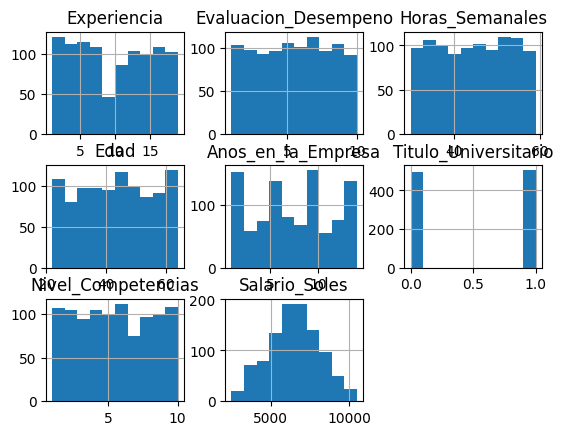

In [ ]:
data.hist()

array([[<Axes: title={'center': 'Experiencia'}>,
        <Axes: title={'center': 'Evaluacion_Desempeno'}>,
        <Axes: title={'center': 'Horas_Semanales'}>],
       [<Axes: title={'center': 'Edad'}>,
        <Axes: title={'center': 'Anos_en_la_Empresa'}>,
        <Axes: title={'center': 'Titulo_Universitario'}>],
       [<Axes: title={'center': 'Nivel_Competencias'}>,
        <Axes: title={'center': 'Salario_Soles'}>, <Axes: >]],
      dtype=object)

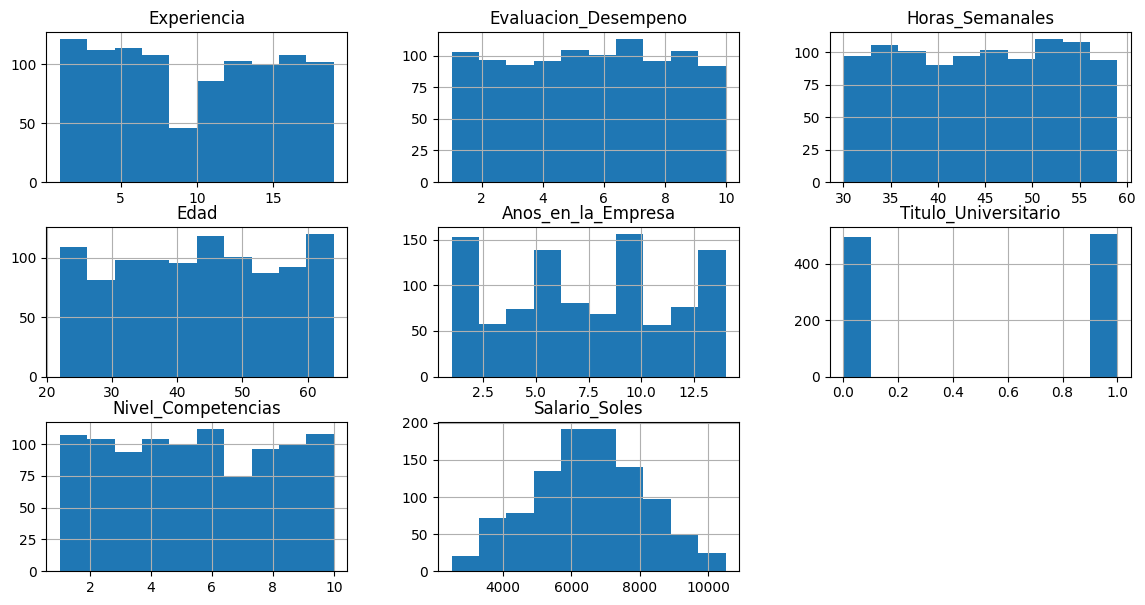

In [ ]:
data.hist(figsize=(14,7)) # hist() funcion para hacer histogramas a todas las variables cuantitativas de tu data

<Axes: ylabel='Salario_Soles'>

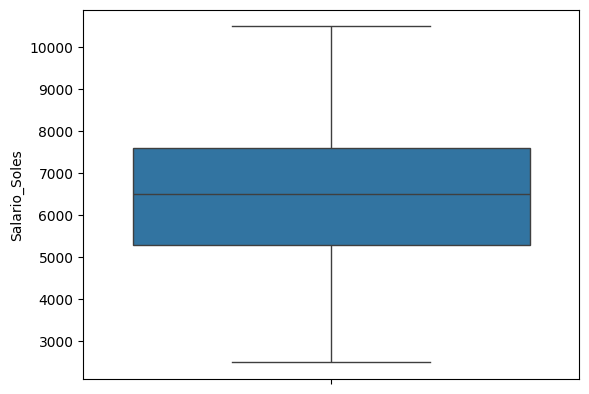

In [ ]:
sns.boxplot(y="Salario_Soles", data=data) # sns es seaborn, boxplot generar grafica de cajas

In [ ]:
data["Salario_Soles"].median()

6500.0

In [ ]:
data["Salario_Soles"].describe()

,Salario_Soles
count,1000.000000
mean,6442.400000
std,1648.447639
min,2500.000000
25%,5300.000000
50%,6500.000000
75%,7600.000000
max,10500.000000


    Variables cualitativas

In [ ]:
data.describe(include=['O']) # data.describe()--> include = ["O"] ... Object

,Nivel_Educativo,Genero,Departamento
count,1000,1000,1000
unique,3,2,4
top,Grado,Hombre,TI
freq,343,515,268


In [ ]:
data["Nivel_Educativo"].value_counts() #value_counts() es un contador de personas según su nivel de instrucción

,count
Nivel_Educativo,
Grado,343
Maestria,336
Doctorado,321


In [ ]:
data["Nivel_Educativo"].value_counts(normalize = True) *100

,proportion
Nivel_Educativo,
Grado,34.3
Maestria,33.6
Doctorado,32.1


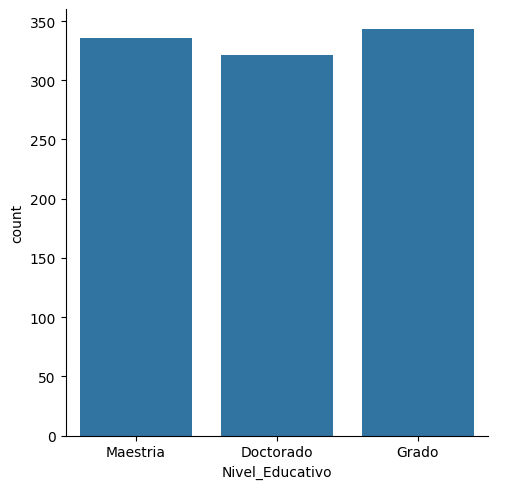

In [ ]:
sns.catplot(x ='Nivel_Educativo', kind='count', data=data) # seaborn (sns)

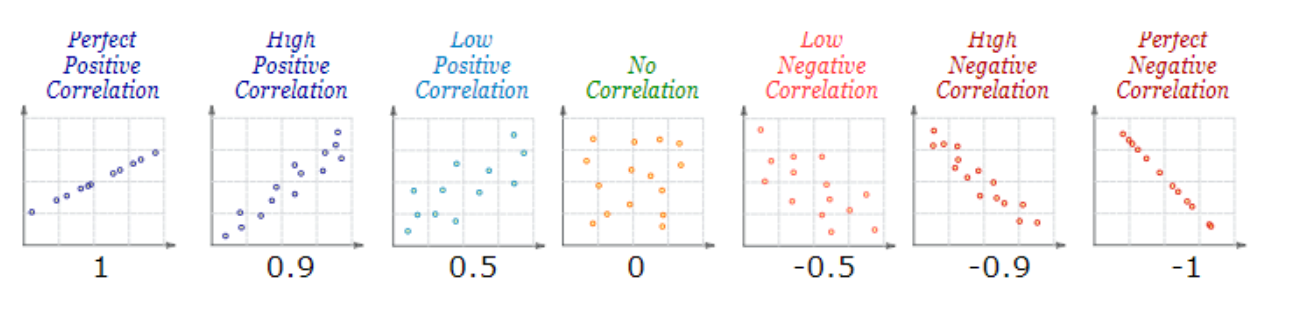

**Análisis Multivariado**

In [ ]:
data.columns # columns que me muestra el nombre exacto de las variables de mi base de datos

Index(['Experiencia', 'Nivel_Educativo', 'Evaluacion_Desempeno',
       'Horas_Semanales', 'Edad', 'Genero', 'Departamento',
       'Anos_en_la_Empresa', 'Titulo_Universitario', 'Nivel_Competencias',
       'Salario_Soles'],
      dtype='object')

<Axes: xlabel='Salario_Soles', ylabel='Experiencia'>

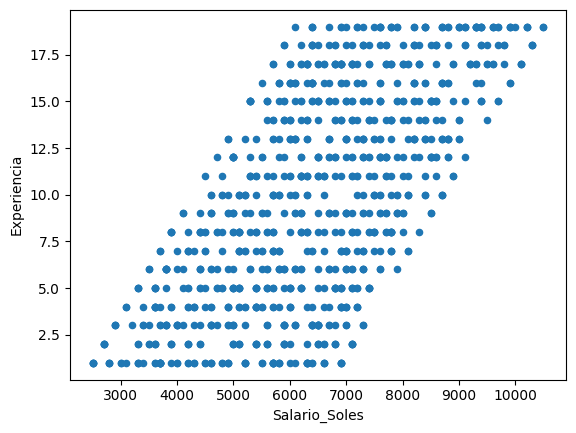

In [ ]:
# ¿Hay relacion entre los años de experiencia y el salario en soles?

data.plot.scatter(x="Salario_Soles", y="Experiencia") # scatter es la funcion de la grafica de dispersion

<Axes: xlabel='Salario_Soles', ylabel='Evaluacion_Desempeno'>

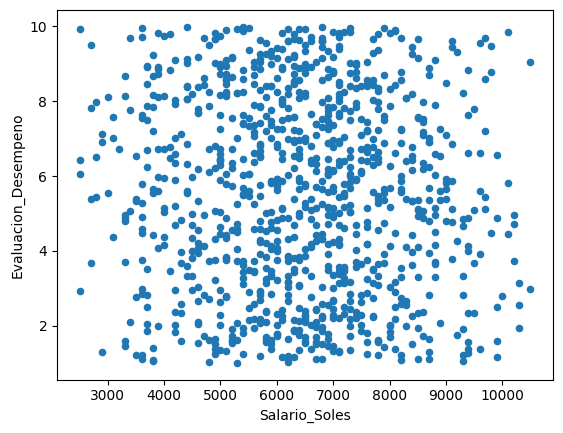

In [ ]:
data.plot.scatter(x="Salario_Soles", y="Evaluacion_Desempeno")

<Axes: xlabel='Salario_Soles', ylabel='Anos_en_la_Empresa'>

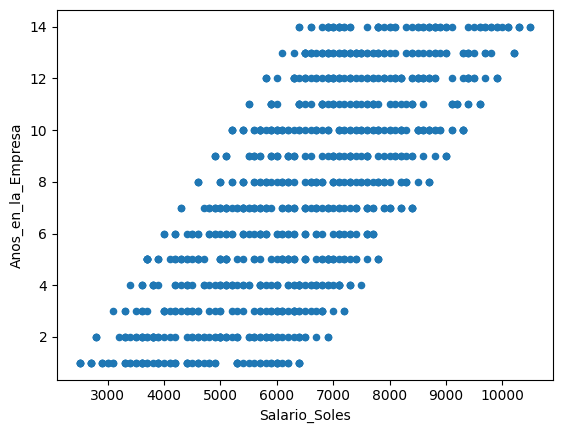

In [ ]:
data.plot.scatter(x="Salario_Soles", y="Anos_en_la_Empresa")

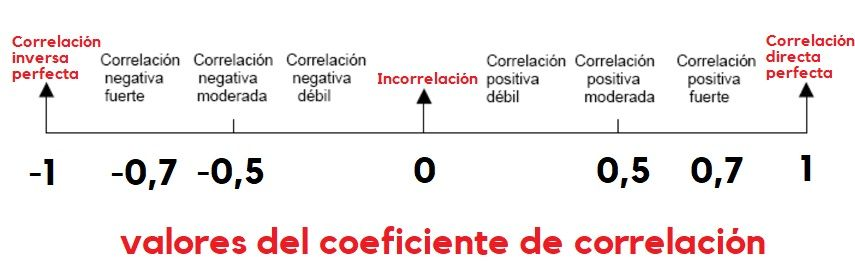

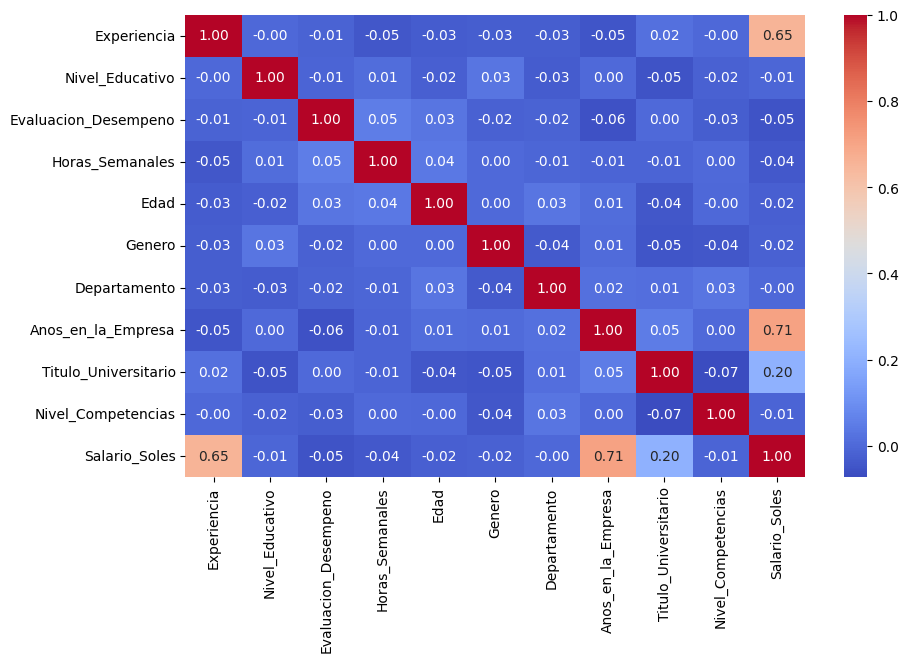

In [ ]:
# Convertir variables categóricas en números
data_encoded = data.copy()

for col in data_encoded.select_dtypes(include=['object']).columns:
    data_encoded[col] = pd.factorize(data_encoded[col])[0]

# Now you can calculate the correlation
corr_matrix = data_encoded.corr()

# Graficar el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


# **Modelo de Regresión**

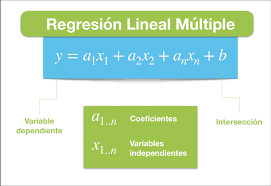

In [ ]:
#¿Cómo quedaría nuestra ecuación?

# Salario_soles = B0 + B1 * Experiencia + B2 * Años en la empresa

In [ ]:
import statsmodels.api as sm # Statsmodels

In [ ]:
#Definir en python cuales son mis variables independientes (X)

X = data[["Experiencia", "Anos_en_la_Empresa"]]

In [ ]:
X

,Experiencia,Anos_en_la_Empresa
0,7,4
1,15,1
2,11,6
3,8,5
4,7,10
...,...,...
995,1,2
996,8,7
997,7,4
998,3,2


In [ ]:
X = sm.add_constant(X) #add_constant crear una columna de 1s (constante) para que modelo de regresion te pueda mostrar el B0

In [ ]:
X

,const,Experiencia,Anos_en_la_Empresa
0,1.0,7,4
1,1.0,15,1
2,1.0,11,6
3,1.0,8,5
4,1.0,7,10
...,...,...,...
995,1.0,1,2
996,1.0,8,7
997,1.0,7,4
998,1.0,3,2


In [ ]:
# Variable dependiente (y)

y = data[["Salario_Soles"]]

**Partición de la data**

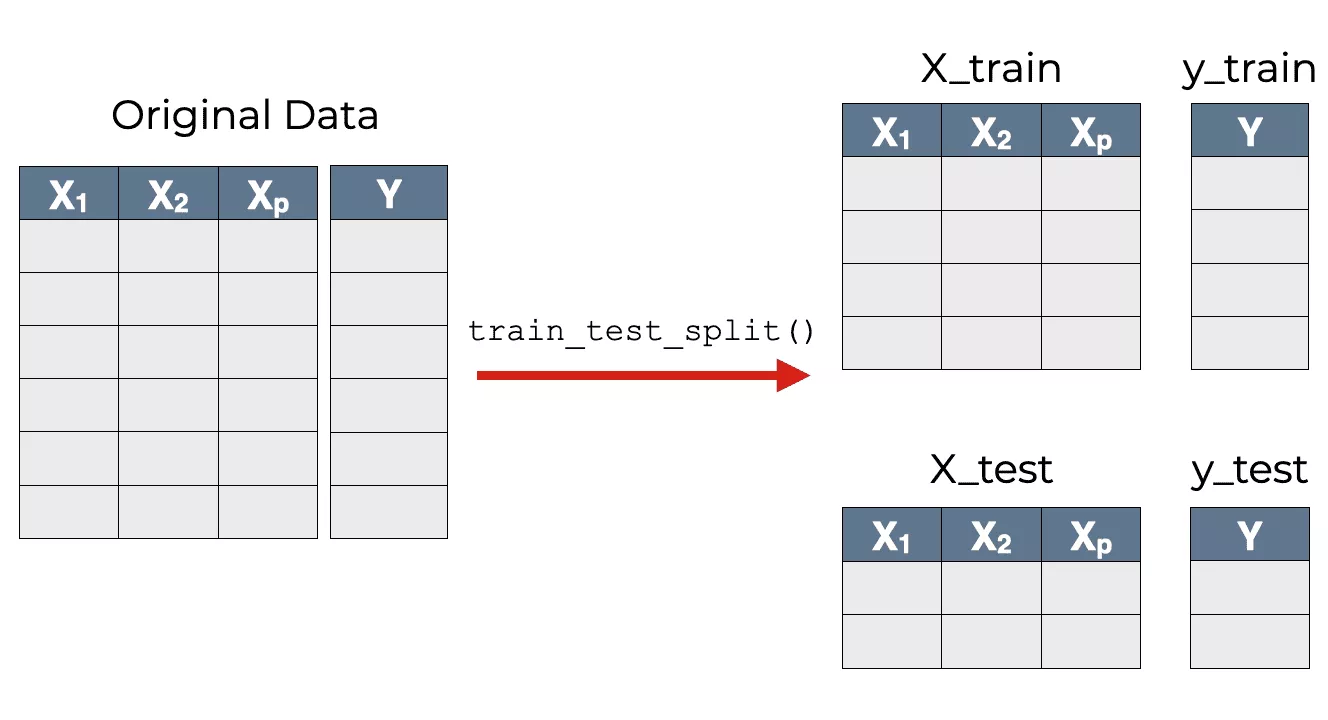

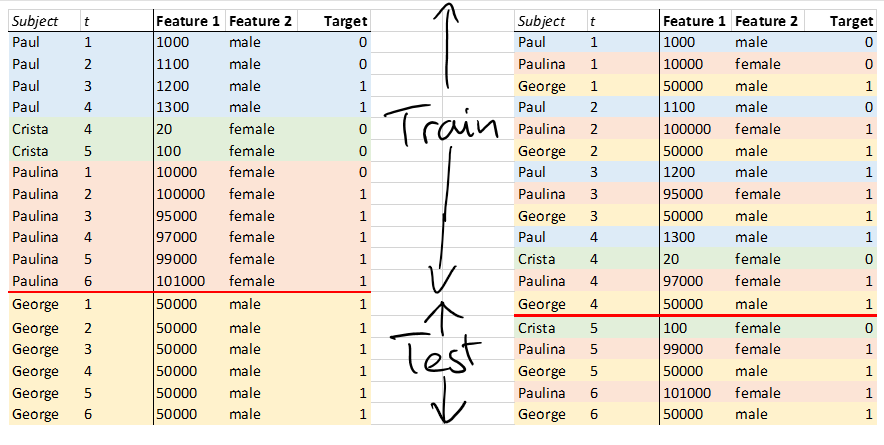

In [ ]:
from sklearn.model_selection import train_test_split #sklearn tiene gran cantidad de funciones para todo lo relacionado al ML

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # random state y seed metodo aleatorio simple

In [ ]:
X.shape # shape filas y columnas

(1000, 3)

In [ ]:
X_train.shape

(800, 3)

In [ ]:
X_test.shape

(200, 3)

In [ ]:
y.shape

(1000, 1)

In [ ]:
y_train.shape

(800, 1)

In [ ]:
y_test.shape

(200, 1)

In [ ]:
# Definir el modelo

modelo = sm.OLS(y_train, X_train) # Ordinary Least Squares : Metodo de los Minimos Cuadrados Ordinarios (Analisis de Regresion)

In [ ]:
# Entrenamos el modelo

resultados = modelo.fit() # fit es la funcion de entrenamiento de modelos de ML

In [ ]:
print(resultados.summary()) # Imprimir o mostrar un resumen del modelo de Regresion que he creado

                            OLS Regression Results                            
Dep. Variable:          Salario_Soles   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 1.793e+04
Date:                Mon, 23 Jun 2025   Prob (F-statistic):               0.00
Time:                        00:04:31   Log-Likelihood:                -5548.0
No. Observations:                 800   AIC:                         1.110e+04
Df Residuals:                     797   BIC:                         1.112e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2186.6967     24

In [ ]:
# Interpretación

In [ ]:
# ¿Cómo interpretamos la columna p-valor?

# Si el valor de p de la variable es menor o igual a 0.05, entonces la variable es significativa para el modelo
# caso contrario (> 0.05) no lo es y por ende no deberia utilizarlo en el modelo
# Deberia volver a entrenar el algoritmo sin las variables significativas (Feature Selection)

In [ ]:
# Modelos Predictivos / Modelos de Proyección

# Modelos de Proyección : Series temporales / Econometría - Tendencia, Ciclicidad, Estacionalidad, Aleatoriedad
                       # Modelos descomposicion, Modelos Autoregresivos, AR, MA, ARMA, ARIMA, Modelos de suavizacion
                       # Modelos de redes neuronales
                       # Modelos hibridos - Prophet (Facebook)
                       # VARIABLE DEPENDIENTE (CUANTI)

# Modelos predictivos : Regresión Lineal Multiple (Cuantitativa) / Regresion Logistica (Cualitativa)  DATA SCIENCE (CORRELACION)
                      # Patrones / Asociaciones / Relaciones respecto a otras variables
                      # Modelos computacionales : LIGTHGBM, RANDOM FOREST, XGBOOST, CATBOOST, ETC, ETC
                      # VARIABLE DEPENDIENTE (CUANTI / CUALI)



**Validación**

In [ ]:
from sklearn.metrics import r2_score # modulo llamado metrics el cual me va a permitir obtener distintos indicadores de calidad

In [ ]:
# Proceso de validación

# 1. Entreno mi modelo y obtengo un R2 de train
# 2. Obtener un R2 de Test
#.   2.1 Generando una prediccion de y (y_pred) con el modelo entrenado sobre tu data X_test
#    2.2 Comparar el resultado predicho del test (y_pred) con la data real (y_test)
#.   2.3 Obtendra el R2 de Test

In [ ]:
y_test

,Salario_Soles
16,8500
726,7600
433,5700
786,6800
206,6000
...,...
108,5400
564,9700
794,5700
684,6000


In [ ]:
X_test

,const,Experiencia,Anos_en_la_Empresa
16,1.0,12,12
726,1.0,10,12
433,1.0,7,6
786,1.0,14,5
206,1.0,16,1
...,...,...,...
108,1.0,5,8
564,1.0,19,13
794,1.0,1,10
684,1.0,14,4


In [ ]:
y_pred = resultados.predict(X_test) # predict me genera una prediccion en este caso sobre la data de var. independientes del testeo

In [ ]:
y_pred

,0
16,8280.338518
726,7876.299532
433,5435.537100
786,6543.889559
206,5724.792577
...,...
108,5643.066098
564,10000.258962
794,5446.556110
684,6238.105567


In [ ]:
r2_statsmodels = r2_score(y_pred, y_test)

In [ ]:
r2_statsmodels # R2 de la data de testeo

0.9720416363135848

In [ ]:
#¿Hay consistencia en los resultados de R2 de train y test?

# Cuando los valores de R2 son similares en el train y el test (Se cumplio)

# R2 train 0.976 y R2 test 0.75 --> Overfitting (Sobreajuste)

In [ ]:
df_test = pd.concat([X_test,y_test], axis=1)

In [ ]:
df_test.head(8)

,const,Experiencia,Anos_en_la_Empresa,Salario_Soles
16,1.0,12,12,8500
726,1.0,10,12,7600
433,1.0,7,6,5700
786,1.0,14,5,6800
206,1.0,16,1,6000
458,1.0,3,7,4700
236,1.0,16,2,6300
598,1.0,14,13,8700


In [ ]:
df_test["y_pred_lineal"] = y_pred

In [ ]:
df_test.head(10)

,const,Experiencia,Anos_en_la_Empresa,Salario_Soles,y_pred_lineal
16,1.0,12,12,8500,8280.338518
726,1.0,10,12,7600,7876.299532
433,1.0,7,6,5700,5435.537100
786,1.0,14,5,6800,6543.889559
206,1.0,16,1,6000,5724.792577
458,1.0,3,7,4700,4933.243120
236,1.0,16,2,6300,6030.576569
598,1.0,14,13,8700,8990.161496
350,1.0,13,12,8200,8482.358011
655,1.0,11,8,7100,6855.183056


In [ ]:
#####
# Definir el modelo TEST

modelo_test = sm.OLS(y_test, X_test) # Ordinary Least Squares : Metodo de los Minimos Cuadrados Ordinarios (Analisis de Regresion)

In [ ]:
##################
# Entrenamos el modelo

resultados = modelo_test.fit() # fit es la funcion de entrenamiento de modelos de ML

In [ ]:
##################################
print(resultados.summary()) # Imprimir o mostrar un resumen del modelo de Regresion que he creado

                            OLS Regression Results                            
Dep. Variable:          Salario_Soles   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     3471.
Date:                Mon, 23 Jun 2025   Prob (F-statistic):          2.65e-154
Time:                        00:11:11   Log-Likelihood:                -1385.1
No. Observations:                 200   AIC:                             2776.
Df Residuals:                     197   BIC:                             2786.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2376.4825     52

In [ ]:
coeficientes =resultados.params
print(coeficientes)

const                 2376.482485
Experiencia            195.442054
Anos_en_la_Empresa     291.155130
dtype: float64


# **Simulador de Regresión**

In [ ]:
# Salario_soles = B0 + B1 * X1 + B2 * X2
# Salario_soles = 2223.7164 + 200.0765 2* Experiencia + 303.9524 * Años en la
# Empresa %%

In [ ]:
Experiencia = 10
Años_en_la_empresa = 5

In [ ]:
Salario_soles = 2376.482485 + 195.442054  * Experiencia + 291.155130   * Años_en_la_empresa

In [ ]:
Salario_soles

5786.678674999999

In [ ]:
# R²  es el coeficiente de determinacion (el cual me permite medir el nivel de predictibilidad de mi modelo)
# ?

# **Otras Opciones de Modelo de Regresión**

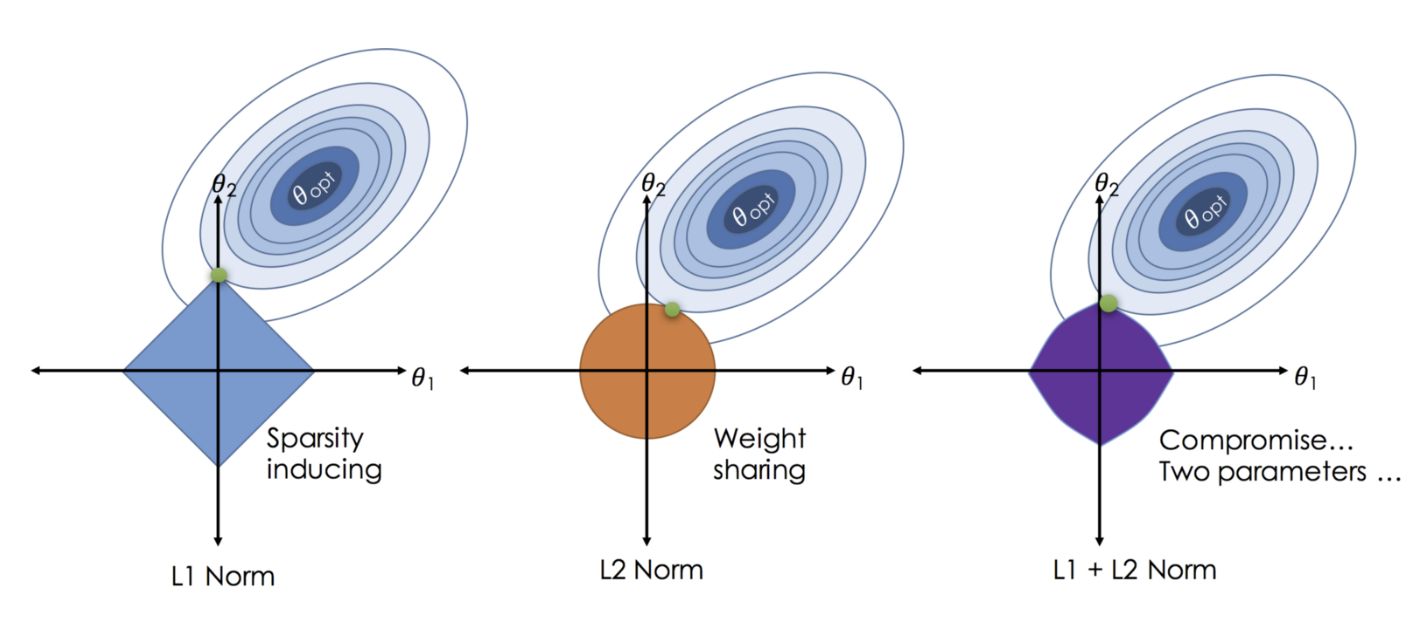

In [ ]:
from sklearn.linear_model import Ridge # OLS mejorado (que tiene un factor llamado regularizacion)
from sklearn.linear_model import Lasso # OLS mejorado (que tiene un factor llamado regularizacion)
from sklearn.linear_model import ElasticNet # OLS mejorado (que en teoria tiene mas factores de regularizacion)
from sklearn.ensemble import RandomForestRegressor # Modelo computacional no tiene una ecuacion

Regresión Lineal con Regularización Ridge

In [ ]:
modelo_RG = Ridge() # Definir el modelo de Ridge con parámetros por default

modelo_RG.fit(X = X_train, y = y_train) # Entrenar el modelo de Ridge

Ridge()

In [ ]:
# Proceso de obtencion del R2 de testeo

# 1. Entrenar el modelo con X_train e y_train
# 2. Hacer predicciones con tu modelo entrenado sobre la data de X_test
# 3. Calcular el R2 de testeo comparando el y_test (real) vs y_pred (prediccion)

# Comparar los R2 de testeo de los diferentes algoritmos que estoy ejecutando

# R2 del modelo del OLS, R2 del modelo de Ridge, R2 del modelo ElasticNet, R2 del modelo Random Forest

In [ ]:
predicciones = modelo_RG.predict(X=X_test)

In [ ]:
predicciones = predicciones.flatten()

In [ ]:
r2_ridge = r2_score(y_test, predicciones)

In [ ]:
r2_ridge

0.9704417238946964

Regresión con Regularización ElasticNet

In [ ]:
modelo_EL = ElasticNet()

modelo_EL.fit(X = X_train, y = y_train)

ElasticNet()

In [ ]:
predicciones_EL = modelo_EL.predict(X = X_test)
predicciones_EL = predicciones_EL.flatten()

In [ ]:
r2_elastic = r2_score(y_test, predicciones_EL)

In [ ]:
r2_elastic

0.9719716870684334

Regresión con Random Forest

In [ ]:
regressor = RandomForestRegressor()
regressor.fit(X = X_train, y = y_train) # SHAP - SHAP VALUE (Ranking de aporte de las variables)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [ ]:
# Objetivo dentro del proceso de modelamiento : TENER EL MEJOR MODELO DE REGRESION

# Seleccione el algoritmo que me traiga un mejor R2 (R2 test)

In [ ]:
predicciones_RF = regressor.predict(X = X_test)


In [ ]:
predicciones_RF

array([ 8348.8452381 ,  7929.76785714,  5486.3284632 ,  6345.98015873,
        5930.25      ,  5127.14285714,  5823.        ,  9014.29761905,
        8522.01785714,  6711.17857143,  6756.17307692,  5198.09036797,
        8483.31156344,  8421.11677212,  8575.2797619 ,  8075.18055556,
        6112.49891775,  7355.16666667,  5223.85714286,  5223.85714286,
        2721.25      ,  6005.83333333,  4369.55952381,  7991.17857143,
        8820.91666667,  6200.        ,  9826.375     ,  7962.30032468,
        5353.25793651,  4860.56746032,  7920.91269841,  7886.75      ,
        6078.67857143,  5025.82142857,  7396.20833333,  6345.98015873,
        5043.25      ,  7532.66666667,  5955.91666667,  5930.25      ,
        6124.73215308,  6475.25      ,  5084.31944444,  5161.84974747,
        3742.70238095,  5486.74512987,  6523.55357143,  5475.3043623 ,
        6112.49891775,  7590.2002442 ,  8137.47619048,  4031.25      ,
        6005.83333333,  7427.00992063,  3933.25      ,  6325.38095238,
      

In [ ]:
predicciones_RF = predicciones_RF.flatten()

In [ ]:
predicciones_RF

array([ 8348.8452381 ,  7929.76785714,  5486.3284632 ,  6345.98015873,
        5930.25      ,  5127.14285714,  5823.        ,  9014.29761905,
        8522.01785714,  6711.17857143,  6756.17307692,  5198.09036797,
        8483.31156344,  8421.11677212,  8575.2797619 ,  8075.18055556,
        6112.49891775,  7355.16666667,  5223.85714286,  5223.85714286,
        2721.25      ,  6005.83333333,  4369.55952381,  7991.17857143,
        8820.91666667,  6200.        ,  9826.375     ,  7962.30032468,
        5353.25793651,  4860.56746032,  7920.91269841,  7886.75      ,
        6078.67857143,  5025.82142857,  7396.20833333,  6345.98015873,
        5043.25      ,  7532.66666667,  5955.91666667,  5930.25      ,
        6124.73215308,  6475.25      ,  5084.31944444,  5161.84974747,
        3742.70238095,  5486.74512987,  6523.55357143,  5475.3043623 ,
        6112.49891775,  7590.2002442 ,  8137.47619048,  4031.25      ,
        6005.83333333,  7427.00992063,  3933.25      ,  6325.38095238,
      

In [ ]:
r2_RF = r2_score(y_test, predicciones_RF)

In [ ]:
r2_RF

0.9621973649272331

# **Comparación del mejor modelo en base al R2**

In [ ]:
# Comparamos los 4 modelos

df_comparacionr2 = pd.DataFrame({
    "modelo":["Statsmodels","Ridge","Elastic-net","Random Forest"],
    "r2-test":[r2_statsmodels,r2_ridge,r2_elastic, r2_RF]
})

In [ ]:
df_comparacionr2

,modelo,r2-test
0,Statsmodels,0.972042
1,Ridge,0.970442
2,Elastic-net,0.971972
3,Random Forest,0.962197
